In [177]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from pandas.plotting import parallel_coordinates
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline


In [175]:

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from itertools import combinations
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [176]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [122]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [124]:
# to display no. of samples on each class
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [125]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

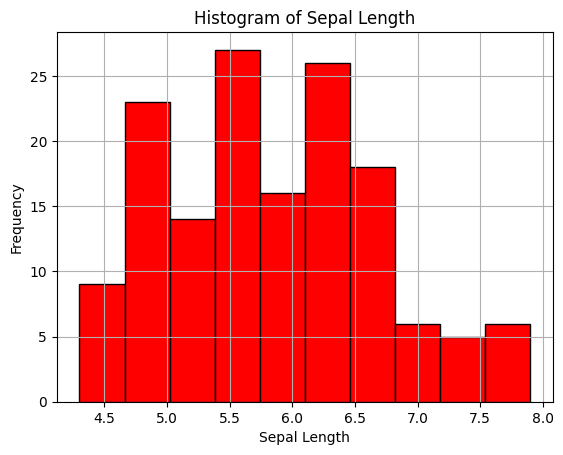

In [126]:
# histograms

# Assuming df is your DataFrame
df['sepal_length'].hist(color='red', edgecolor='black')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()


<Axes: >

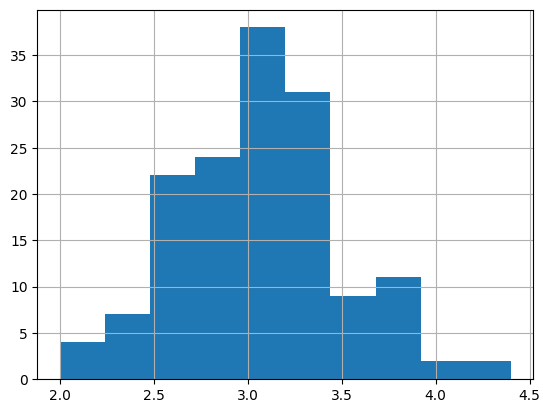

In [127]:
df['sepal_width'].hist()

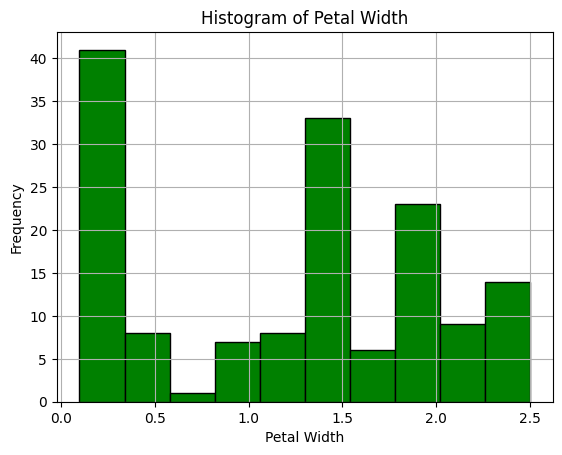

In [128]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['petal_width'].hist(color='green', edgecolor='black')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')
plt.show()


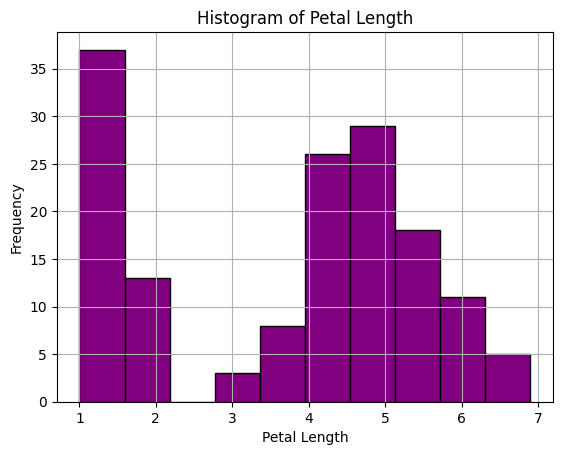

In [129]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['petal_length'].hist(color='purple', edgecolor='black')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')
plt.show()


In [178]:
colors = ['purple', 'red', 'green']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

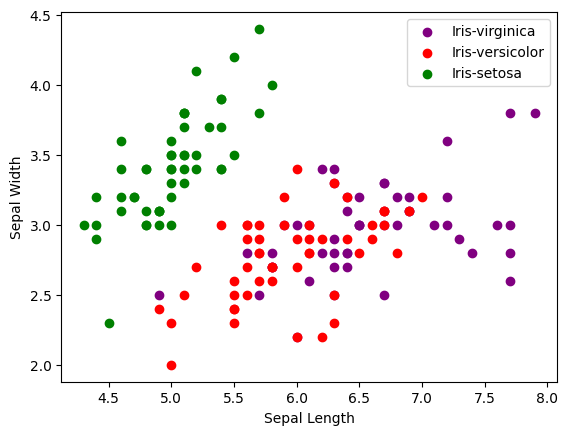

In [179]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

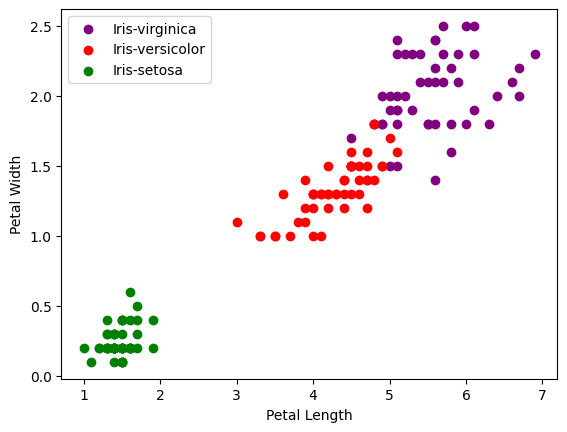

In [180]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

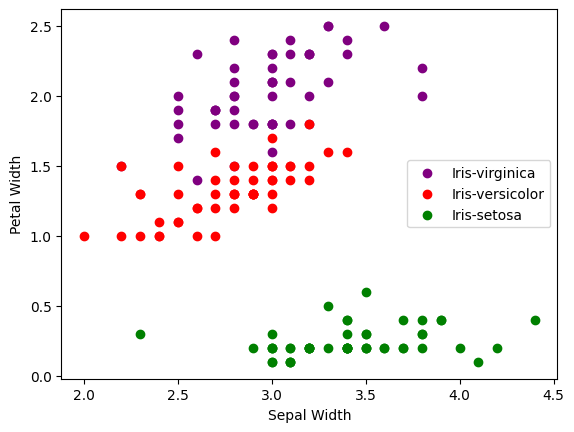

In [181]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

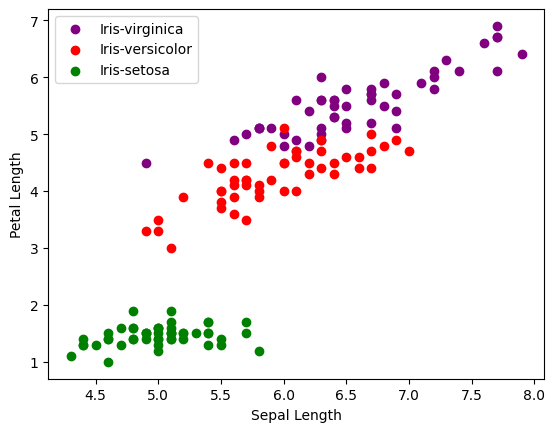

In [182]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

In [183]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [184]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [185]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


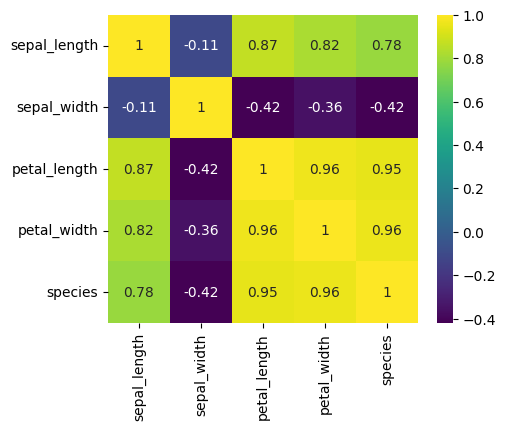

In [186]:

# Assuming df is your DataFrame
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='viridis')
plt.show()


In [187]:
sns.pairplot(df,hue='species')
plt.show(

SyntaxError: incomplete input (2237559609.py, line 2)

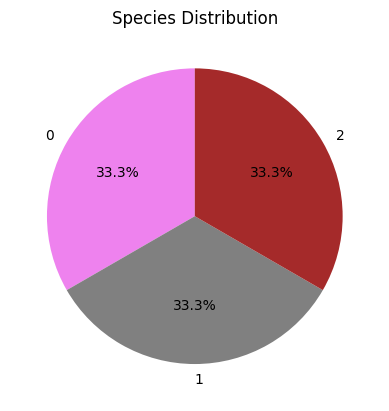

In [188]:
colors = ['violet','grey','brown']  # Custom colors for the pie slices
df['species'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Species Distribution')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.show()

In [189]:
X = df.drop(columns='species')
y = df['species']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [190]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [191]:
y_pred_knn = knn.predict(X_test)

In [192]:
print(f"Accuaracy Knn {accuracy_score(y_test,y_pred_knn)}")
print(f"Confussion matrix:\n {confusion_matrix(y_test,y_pred_knn)}")

Accuaracy Knn 1.0
Confussion matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


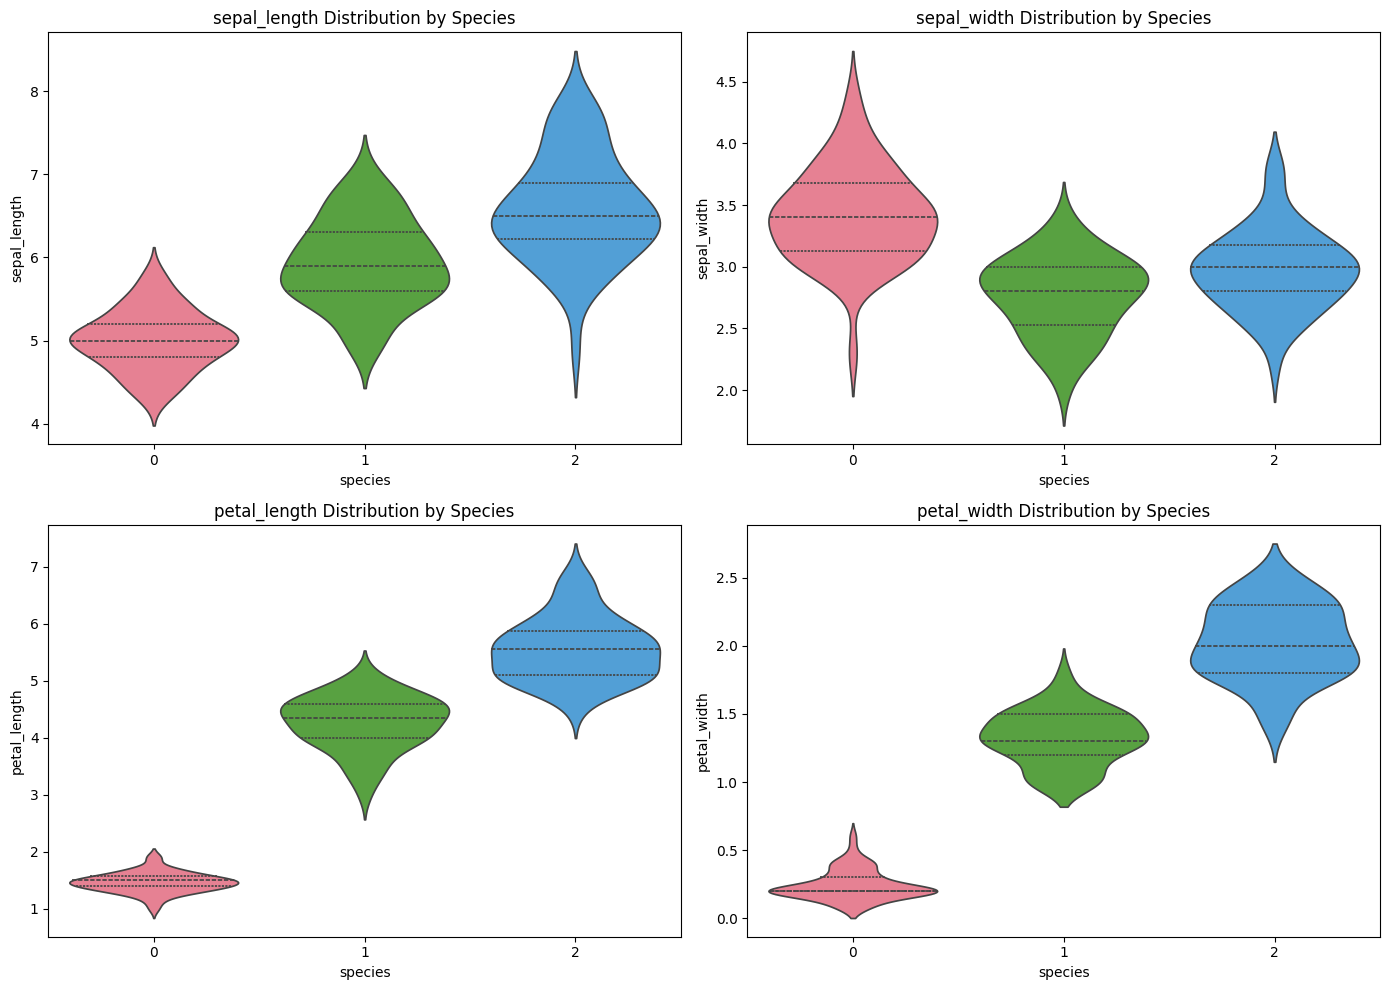

In [193]:
plt.figure(figsize=(14, 10))
palette = sns.color_palette('husl', len(df['species'].unique()))  # 'husl' is an example
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='species', y=column, data=df, inner='quartile', palette=palette)
    plt.title(f'{column} Distribution by Species')
plt.tight_layout()  
plt.show()


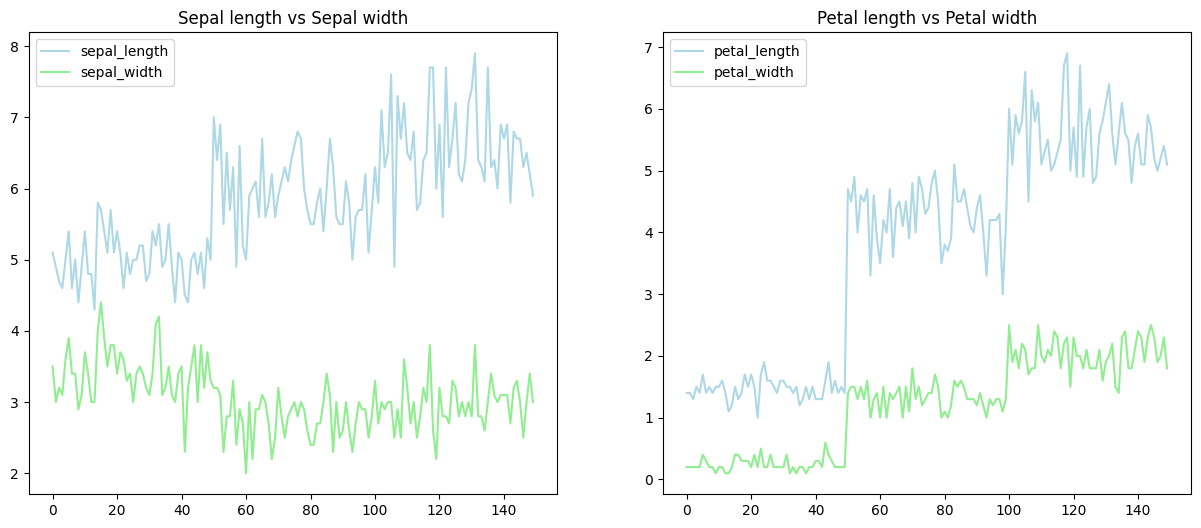

In [194]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(df['sepal_length'], label='sepal_length',color='lightblue')
ax[0].plot(df['sepal_width'], label='sepal_width',color='lightgreen')
ax[0].set_title('Sepal length vs Sepal width')
ax[0].legend()

ax[1].plot(df['petal_length'], label='petal_length',color='lightblue')
ax[1].plot(df['petal_width'], label='petal_width',color='lightgreen')
ax[1].set_title('Petal length vs Petal width')
ax[1].legend()

plt.show()

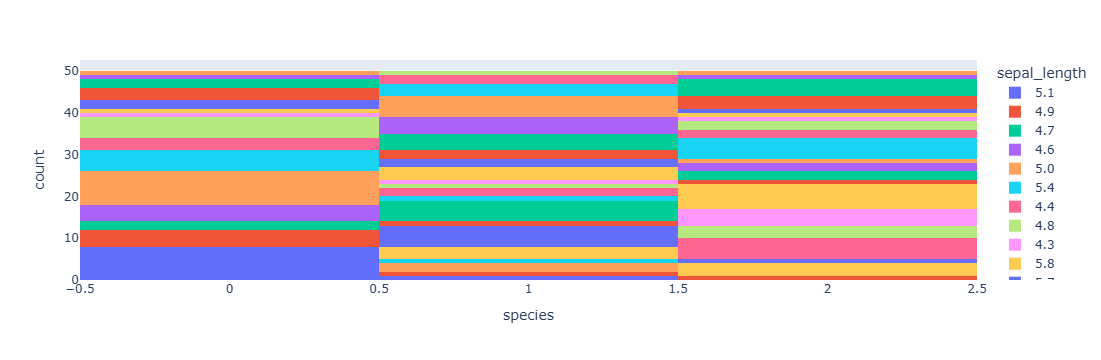

In [195]:
fig1 = px.histogram(df, x="species", color="sepal_length")  
fig1.show()  

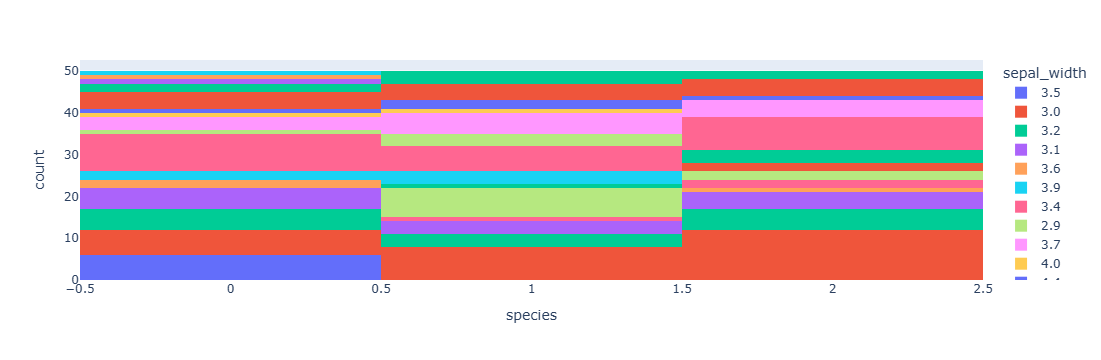

In [196]:
fig2 = px.histogram(df, x="species", color="sepal_width")  
fig2.show()  

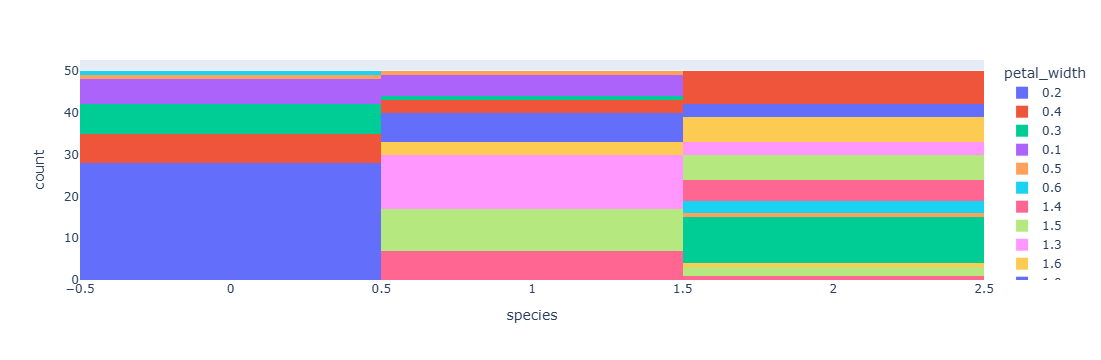

In [197]:
fig3 = px.histogram(df, x="species", color="petal_width")  
fig3.show()  

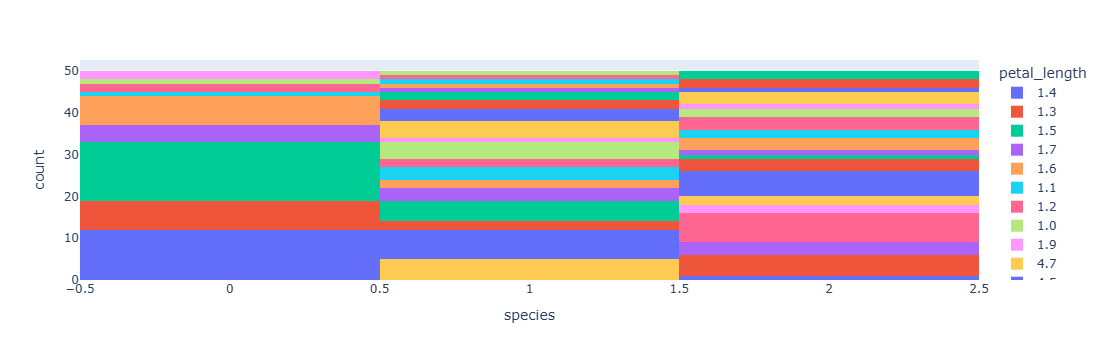

In [198]:
fig4= px.histogram(df, x="species", color="petal_length")  
fig4.show() 

In [199]:
df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'target': [2.3, 2.5, 3.1, 4.0, 5.0]
})

# Prepare the data
X = df[['feature1', 'feature2']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost Regressor model
xgboost = XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost.fit(X_train, y_train)

# Make predictions
y_pred_xgboost_train = xgboost.predict(X_train)
y_pred_xgboost_test = xgboost.predict(X_test)

# Evaluate the model
train_error = mean_squared_error(y_train, y_pred_xgboost_train)
test_error = mean_squared_error(y_test, y_pred_xgboost_test)

print(f'Training Error: {train_error}')
print(f'Test Error: {test_error}')


Training Error: 5.558596313904803e-07
Test Error: 0.039561772837771514


In [200]:
encode = LabelEncoder() 
y = encode.fit_transform(y)
y

array([0, 1, 2, 3, 4], dtype=int64)

<Axes: >

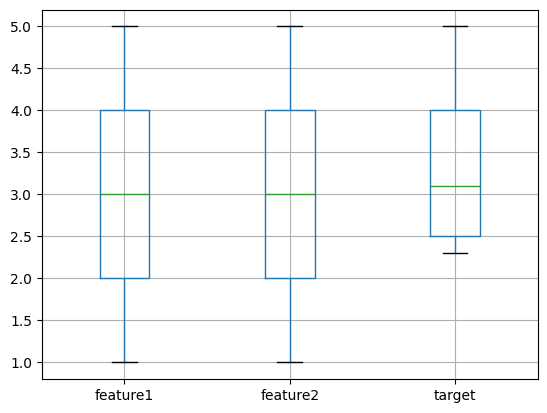

In [201]:
df.boxplot()

In [202]:
print(df.columns)


Index(['feature1', 'feature2', 'target'], dtype='object')


In [203]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load or create your DataFrame
df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'target': [0, 1, 0, 1, 0]
})

# Split the data
X = df.drop('target', axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100

# Print accuracy
print("Accuracy:", accuracy)


Accuracy: 0.0


In [204]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [206]:
# model training
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [207]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [159]:
print(df.columns)


Index(['feature1', 'feature2', 'target'], dtype='object')


In [160]:
print(df.head())


   feature1  feature2  target
0         1         5       0
1         2         4       1
2         3         3       0
3         4         2       1
4         5         1       0


In [162]:
y_test

1    1
Name: target, dtype: int64

In [169]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [170]:
lr.fit(x_train, y_train)
lr.score(x_train,y_train)

0.75

In [171]:
predictions = lr.predict(x_test)
predictions

array([0], dtype=int64)

In [172]:
y_test

1    1
Name: target, dtype: int64

In [173]:
x_test

,feature1,feature2
1,2,4
